# Figures for Corpora Comparison between bioRxiv,  Pubmed Central, New York Times

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

from cairosvg import svg2png
from IPython.display import Image
import plotnine as p9

from annorxiver_modules.corpora_comparison_helper import(
    calculate_confidence_intervals,
    create_lemma_count_df,
    plot_pointplot,
    plot_bargraph,
    plot_point_bar_figure
)

In [2]:
subset = 20

# KL Divergence Graph

In [3]:
kl_divergence_df = pd.read_csv(
    "output/comparison_stats/corpora_kl_divergence.tsv", 
    sep="\t"
)
kl_divergence_df.head()

,num_terms,KL_divergence,comparison
0,100,0.023430,biorxiv_vs_pmc
1,100,0.473538,biorxiv_vs_nytac
2,100,0.294210,pmc_vs_nytac
3,200,0.037528,biorxiv_vs_pmc
4,200,0.639116,biorxiv_vs_nytac


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/figures/corpora_kl_divergence.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


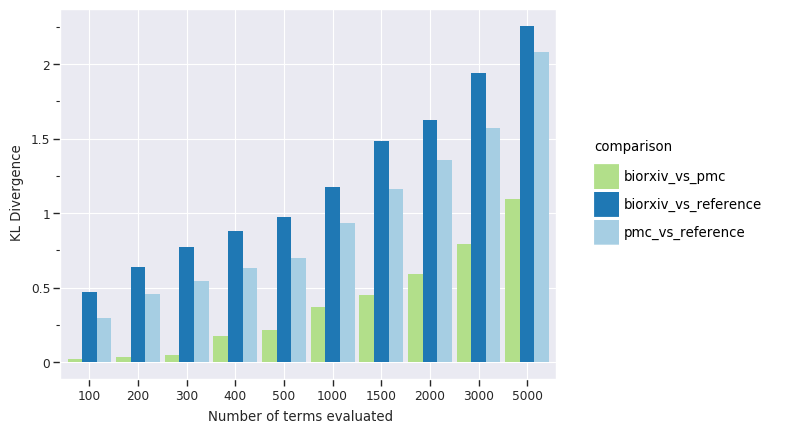

<ggplot: (-9223363309186334390)>


In [4]:
g = (
    p9.ggplot(
        kl_divergence_df.replace({
        "biorxiv_vs_nytac":"biorxiv_vs_reference",
        "pmc_vs_nytac": "pmc_vs_reference"
        })
    )
    + p9.aes(x="factor(num_terms)", y="KL_divergence", fill="comparison")
    + p9.geom_col(stat='identity', position='dodge')
    + p9.scale_fill_manual(["#b2df8a", "#1f78b4", "#a6cee3"])
    + p9.labs(
        x = "Number of terms evaluated",
        y = "KL Divergence"
    )
    + p9.theme_seaborn(context='paper')
)
g.save("output/figures/corpora_kl_divergence.png", dpi=500)
print(g)

# bioRxiv vs Pubmed Central

In [5]:
full_text_comparison = pd.read_csv(
    "output/comparison_stats/biorxiv_vs_pmc_comparison.tsv",
    sep="\t"
)
full_text_comparison.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio
0,’,345652,4837734,262494660,5365015381,41488.085876,1.460319
1,–,211069,7614840,262494660,5365015381,79745.759155,0.566519
2,growth,240308,3933709,262494660,5365015381,10453.263824,1.248580
3,risk,94155,5338328,262494660,5365015381,136800.666016,0.360486
4,rna,280074,3073361,262494660,5365015381,83766.772949,1.862558


## Line Plots

In [6]:
full_plot_df = calculate_confidence_intervals(
    full_text_comparison
)
full_plot_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds
0,’,345652,4837734,262494660,5365015381,41488.085876,1.460319,1.455285,1.465370
1,–,211069,7614840,262494660,5365015381,79745.759155,0.566519,0.564073,0.568975
2,growth,240308,3933709,262494660,5365015381,10453.263824,1.248580,1.243446,1.253736
3,risk,94155,5338328,262494660,5365015381,136800.666016,0.360486,0.358170,0.362817
4,rna,280074,3073361,262494660,5365015381,83766.772949,1.862558,1.855362,1.869781


In [7]:
plot_df = (
    full_plot_df
    .sort_values("odds_ratio", ascending=False)
    .head(subset)
    .append(
        full_plot_df
        .sort_values("odds_ratio", ascending=False)
        .iloc[:-2]
        .tail(subset)
    )
    .replace('rna', 'RNA')
)
plot_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds
74,neurons,245673,1628424,262494660,5365015381,205552.058197,3.083475,3.070416,3.096589
44,genome,310549,2157447,262494660,5365015381,242049.757538,2.941985,2.930933,2.953079
52,genetic,246116,2193087,262494660,5365015381,122719.776398,2.293689,2.284148,2.303270
121,regions,276621,2613208,262494660,5365015381,121417.507721,2.163524,2.155058,2.172023
81,al,1754312,17451861,262494660,5365015381,678998.794312,2.054545,2.051348,2.057747


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 13.653333333333334 x 10.24 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/biorxiv_pmc_frequency_odds.svg
  warn('Filename: {}'.format(filename), PlotnineWarning)


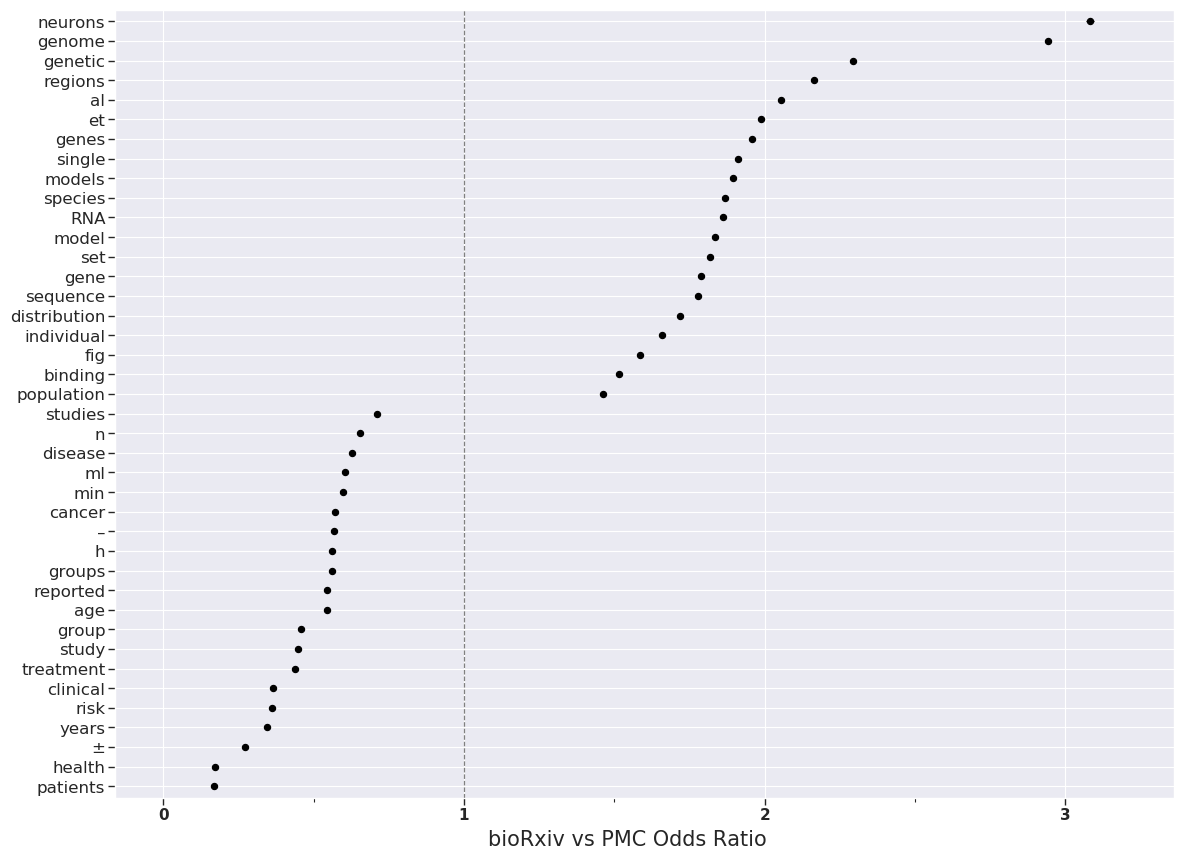

<ggplot: (8727668443803)>


In [8]:
g = plot_pointplot(plot_df, "bioRxiv vs PMC Odds Ratio")
g.save("output/svg_files/biorxiv_pmc_frequency_odds.svg", dpi=75)
print(g)

In [9]:
count_plot_df = create_lemma_count_df(plot_df, 'bioRxiv', 'pmc')
count_plot_df.head()

,lemma,count,repository
0,neurons,245673,bioRxiv
1,genome,310549,bioRxiv
2,genetic,246116,bioRxiv
3,regions,276621,bioRxiv
4,al,1754312,bioRxiv


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 13.653333333333334 x 10.24 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/biorxiv_pmc_frequency_bar.svg
  warn('Filename: {}'.format(filename), PlotnineWarning)


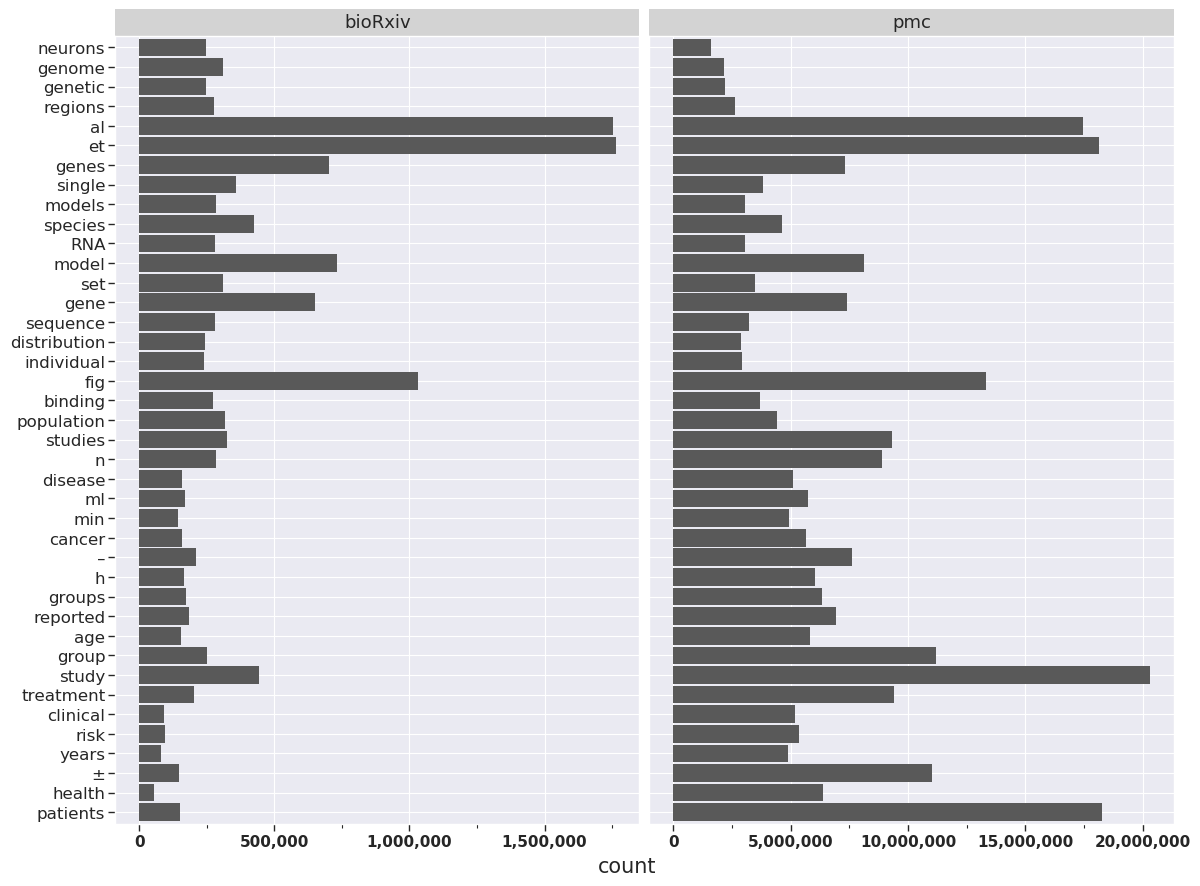

<ggplot: (8727665977741)>


In [10]:
g = plot_bargraph(count_plot_df, plot_df)
g.save("output/svg_files/biorxiv_pmc_frequency_bar.svg", dpi=75)
print(g)

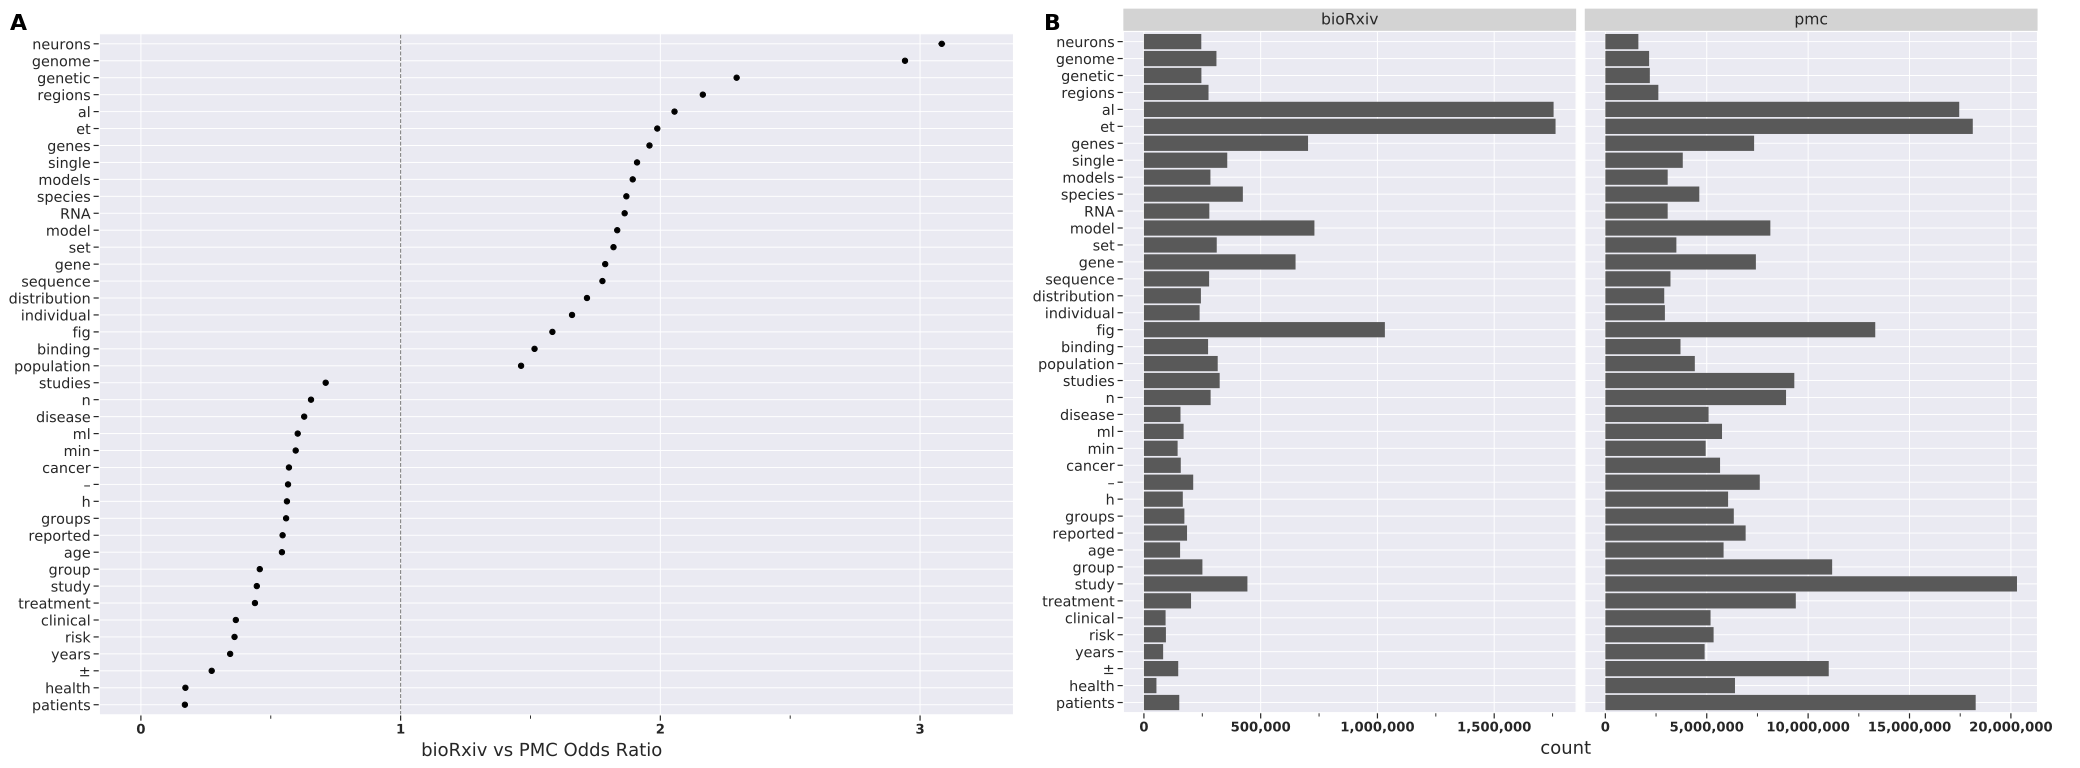

In [11]:
fig_output_path = "output/figures/biorxiv_vs_pubmed_central.png"

fig = plot_point_bar_figure(
    "output/svg_files/biorxiv_pmc_frequency_odds.svg",
    "output/svg_files/biorxiv_pmc_frequency_bar.svg"
)

# save generated SVG files
svg2png(
    bytestring=fig.to_str(), 
    write_to=fig_output_path,
    dpi=500
)

Image(fig_output_path)

# bioRxiv vs Reference

In [12]:
full_text_comparison = pd.read_csv(
    "output/comparison_stats/biorxiv_nytac_comparison.tsv",
    sep="\t"
)
full_text_comparison.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio
0,house,11025,802719,262494660,659277495,448757.653778,0.034496
1,yesterday,65,816741,262494660,659277495,545985.714767,0.000200
2,best,82201,501641,262494660,659277495,68168.151474,0.411559
3,’,345652,1070,262494660,659277495,854209.302498,811.340349
4,net,22817,504167,262494660,659277495,207272.925217,0.113666


## Line Plots

In [13]:
full_plot_df = calculate_confidence_intervals(
    full_text_comparison
)
full_plot_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds
0,house,11025,802719,262494660,659277495,448757.653778,0.034496,0.033853,0.035150
1,yesterday,65,816741,262494660,659277495,545985.714767,0.000200,0.000157,0.000255
2,best,82201,501641,262494660,659277495,68168.151474,0.411559,0.408534,0.414606
3,’,345652,1070,262494660,659277495,854209.302498,811.340349,764.082557,861.520991
4,net,22817,504167,262494660,659277495,207272.925217,0.113666,0.112168,0.115184


In [14]:
plot_df = (
    full_plot_df
    .sort_values("odds_ratio", ascending=False)
    .head(subset)
    .append(
        full_plot_df
        .sort_values("odds_ratio", ascending=False)
        .iloc[:-2]
        .tail(subset)
    )
    .replace('rna', 'RNA')
)
plot_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds
21,°,302552,2,262494660,659277495,7.597517e+05,379942.442767,95019.857450,1.519222e+06
143,mm,238592,360,262494660,659277495,5.940637e+05,1664.566519,1501.081229,1.845857e+03
141,fig,1031812,2541,262494660,659277495,2.555250e+06,1019.867348,980.926247,1.060354e+03
3,’,345652,1070,262494660,659277495,8.542093e+05,811.340349,764.082557,8.615210e+02
7,RNA,280074,1088,262494660,659277495,6.898414e+05,646.534459,609.165381,6.861959e+02


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 13.653333333333334 x 10.24 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/biorxiv_nytac_frequency_odds.svg
  warn('Filename: {}'.format(filename), PlotnineWarning)


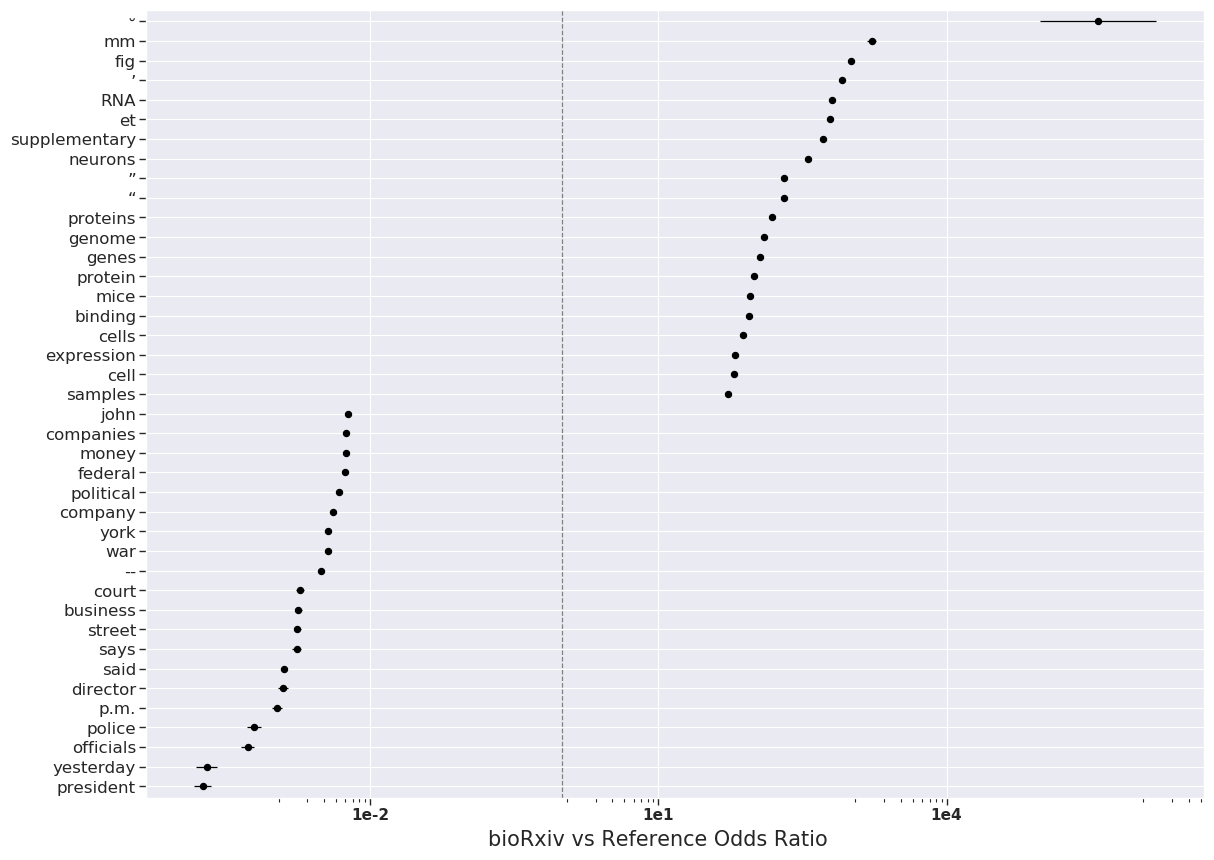

<ggplot: (8727663896724)>


In [15]:
g = plot_pointplot(plot_df, "bioRxiv vs Reference Odds Ratio", True)
g.save("output/svg_files/biorxiv_nytac_frequency_odds.svg", dpi=75)
print(g)

In [16]:
count_plot_df = create_lemma_count_df(
    plot_df, 'bioRxiv', 'reference'
)
count_plot_df.head()

,lemma,count,repository
0,°,302552,bioRxiv
1,mm,238592,bioRxiv
2,fig,1031812,bioRxiv
3,’,345652,bioRxiv
4,RNA,280074,bioRxiv


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 13.653333333333334 x 10.24 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/biorxiv_nytac_frequency_bar.svg
  warn('Filename: {}'.format(filename), PlotnineWarning)


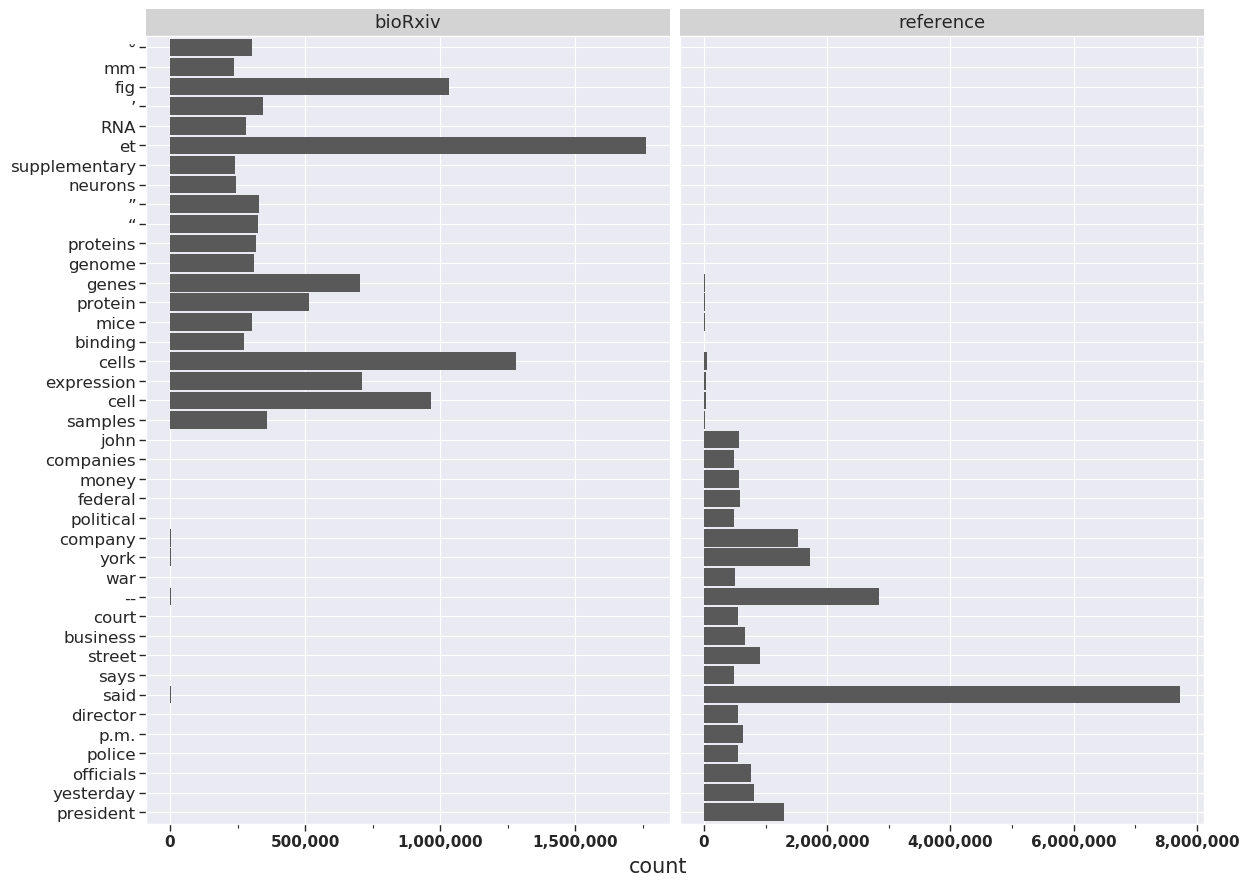

<ggplot: (8727663996806)>


In [17]:
g = plot_bargraph(count_plot_df, plot_df)
g.save("output/svg_files/biorxiv_nytac_frequency_bar.svg", dpi=75)
print(g)

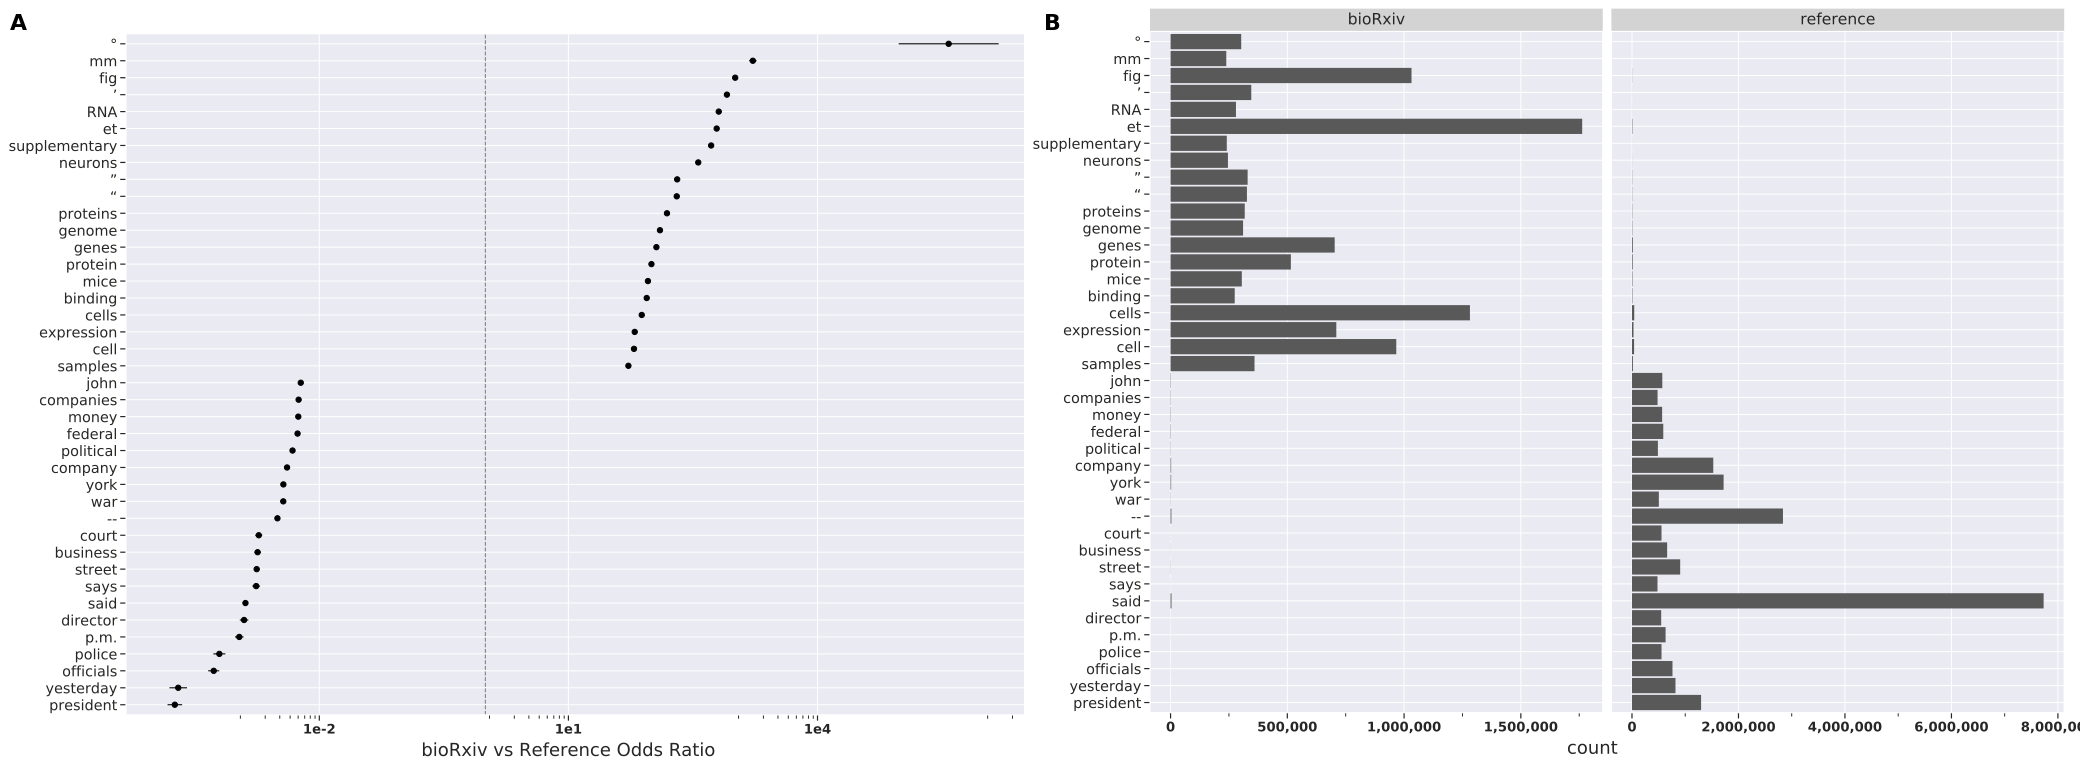

In [18]:
fig_output_path = "output/figures/biorxiv_vs_reference.png"

fig = plot_point_bar_figure(
    "output/svg_files/biorxiv_nytac_frequency_odds.svg",
    "output/svg_files/biorxiv_nytac_frequency_bar.svg"
)

# save generated SVG files
svg2png(
    bytestring=fig.to_str(), 
    write_to=fig_output_path,
    dpi=500
)

Image(fig_output_path)

# PMC vs Reference

In [19]:
full_text_comparison = pd.read_csv(
    "output/comparison_stats/pmc_nytac_comparison.tsv",
    sep="\t"
)
full_text_comparison.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio
0,house,236735,802719,5365015381,659277495,2.490533e+06,0.036241
1,yesterday,3190,816741,5365015381,659277495,3.572001e+06,0.000480
2,best,1323985,501641,5365015381,659277495,3.796544e+05,0.324330
3,’,4837734,1070,5365015381,659277495,1.105503e+06,555.591365
4,–,7614840,1,5365015381,659277495,1.763922e+06,935746.178437


## Line Plots

In [20]:
full_plot_df = calculate_confidence_intervals(
    full_text_comparison
)
full_plot_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds
0,house,236735,802719,5365015381,659277495,2.490533e+06,0.036241,0.036075,3.640720e-02
1,yesterday,3190,816741,5365015381,659277495,3.572001e+06,0.000480,0.000464,4.969402e-04
2,best,1323985,501641,5365015381,659277495,3.796544e+05,0.324330,0.323278,3.253861e-01
3,’,4837734,1070,5365015381,659277495,1.105503e+06,555.591365,523.275158,5.899033e+02
4,–,7614840,1,5365015381,659277495,1.763922e+06,935746.178437,131807.711894,6.643169e+06


In [21]:
plot_df = (
    full_plot_df
    .sort_values("odds_ratio", ascending=False)
    .iloc[1:]
    .head(subset)
    .append(
        full_plot_df
        .sort_values("odds_ratio", ascending=False)
        .iloc[:-2]
        .tail(subset)
    )
    .replace('rna', 'RNA')
)
plot_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds
117,±,11016756,1,5365015381,659277495,2.551201e+06,1.353789e+06,190692.576412,9.610992e+06
4,–,7614840,1,5365015381,659277495,1.763922e+06,9.357462e+05,131807.711894,6.643169e+06
160,,5160158,1,5365015381,659277495,1.195562e+06,6.341037e+05,89318.827100,4.501710e+06
19,°,8136102,2,5365015381,659277495,1.884558e+06,4.999006e+05,125020.764437,1.998873e+06
70,ml,5753367,182,5365015381,659277495,1.329636e+06,3.884615e+03,3359.313585,4.492058e+03


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 13.653333333333334 x 10.24 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/pmc_nytac_frequency_odds.svg
  warn('Filename: {}'.format(filename), PlotnineWarning)


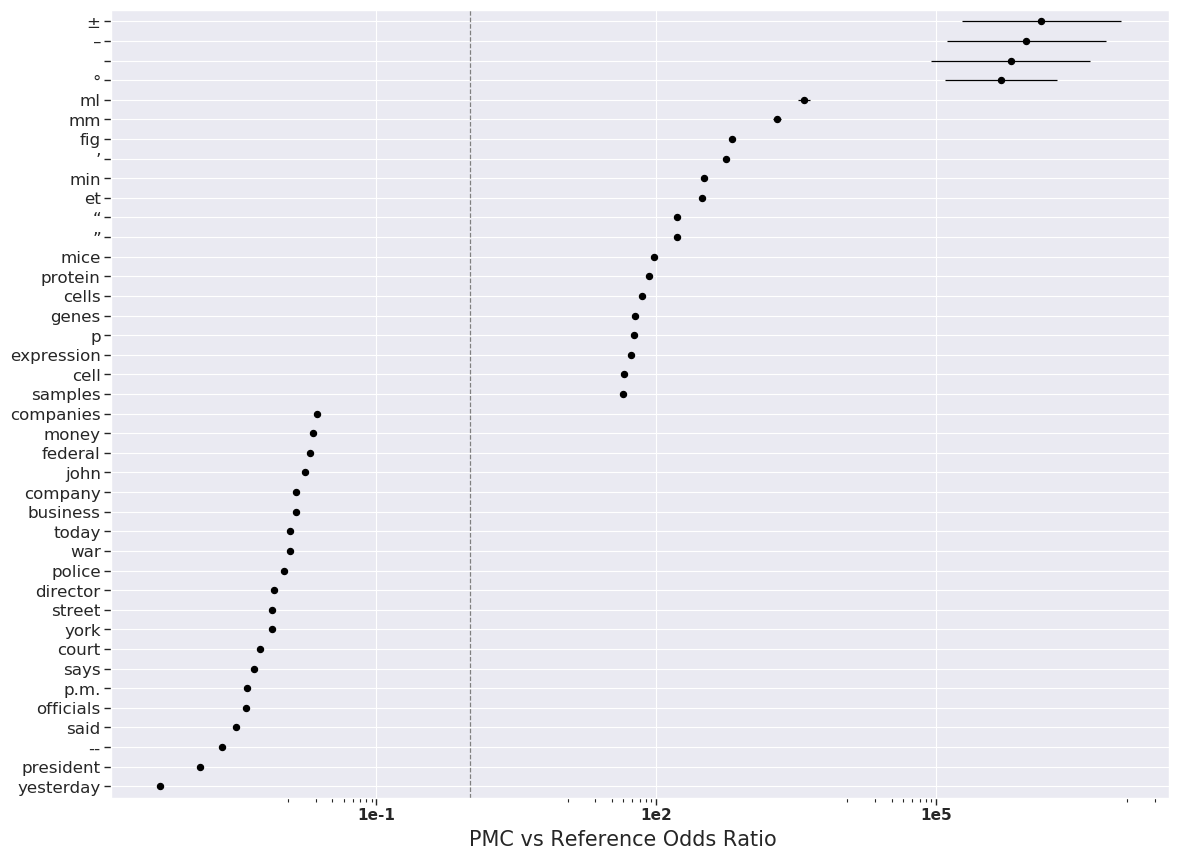

<ggplot: (8727665993094)>


In [22]:
g = plot_pointplot(plot_df, "PMC vs Reference Odds Ratio", True)
g.save("output/svg_files/pmc_nytac_frequency_odds.svg", dpi=75)
print(g)

In [23]:
count_plot_df = create_lemma_count_df(
    plot_df, 'pmc', 'reference'
)
count_plot_df.head()

,lemma,count,repository
0,±,11016756,pmc
1,–,7614840,pmc
2,,5160158,pmc
3,°,8136102,pmc
4,ml,5753367,pmc


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 13.653333333333334 x 10.24 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/pmc_nytac_frequency_bar.svg
  warn('Filename: {}'.format(filename), PlotnineWarning)


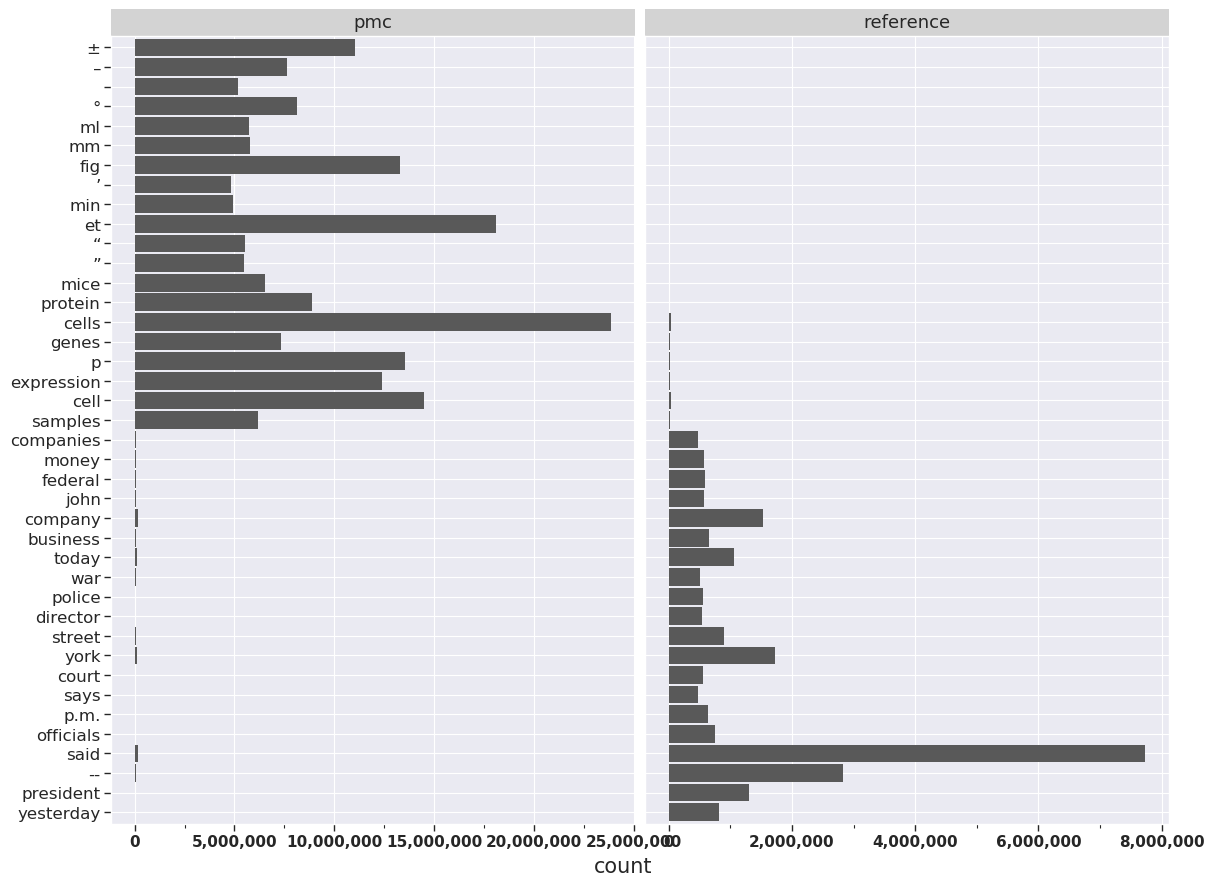

<ggplot: (8727663610088)>


In [24]:
g = plot_bargraph(count_plot_df, plot_df)
g.save("output/svg_files/pmc_nytac_frequency_bar.svg", dpi=75)
print(g)

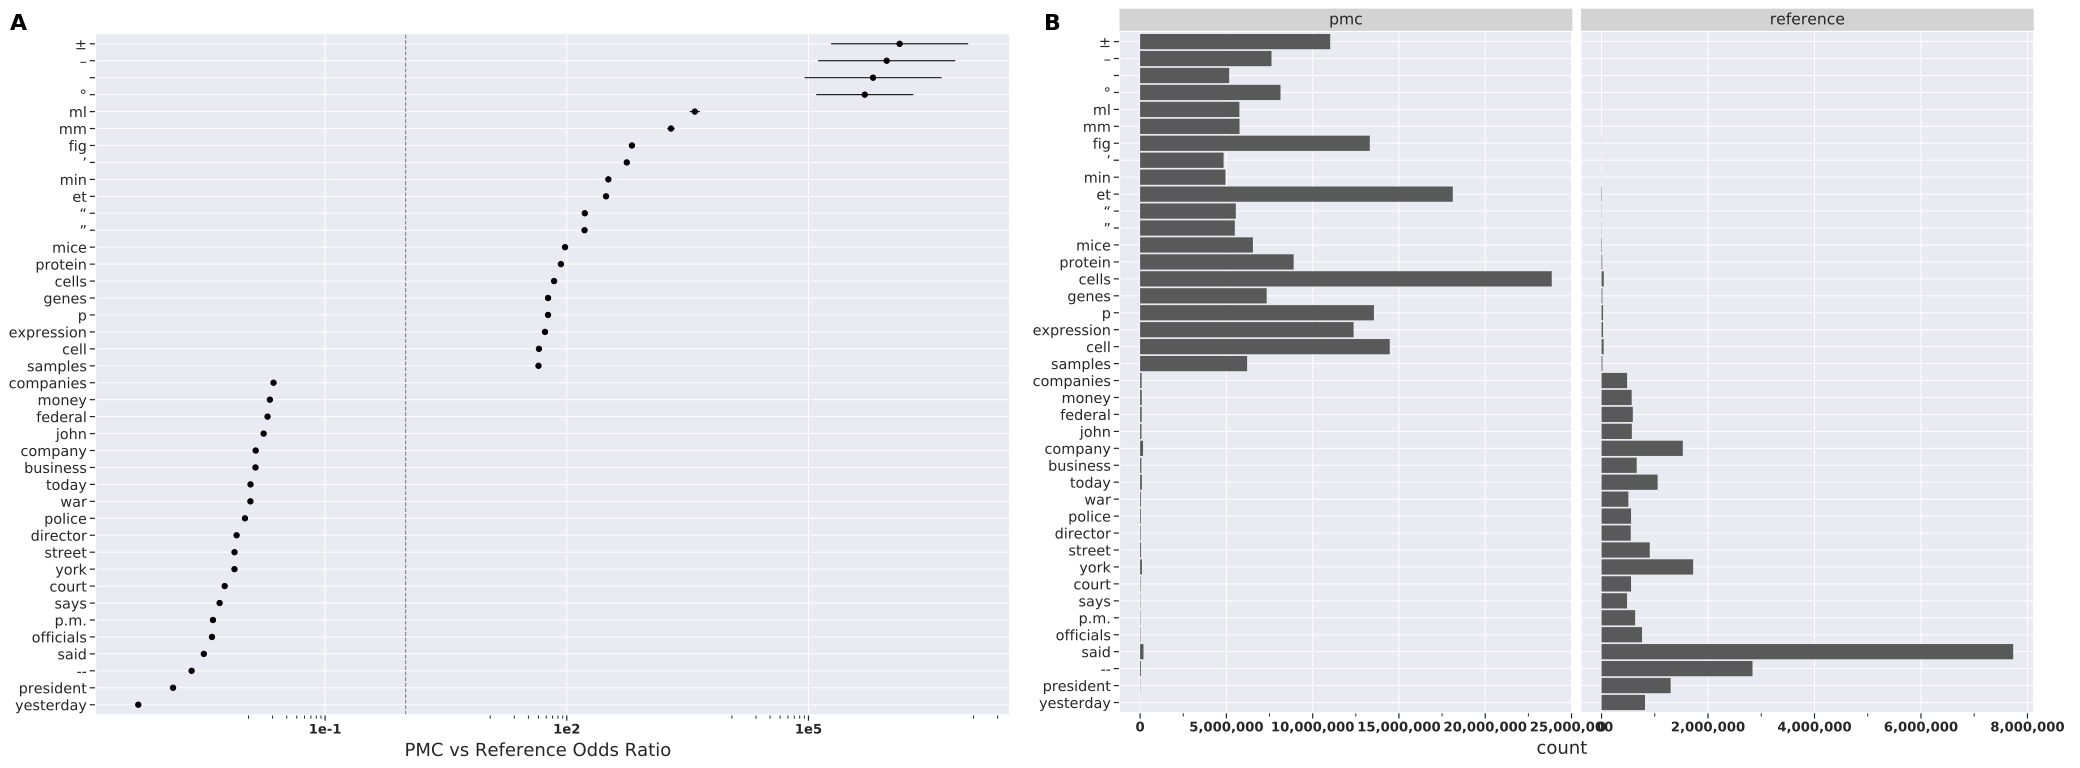

In [25]:
fig_output_path = "output/figures/pmc_vs_reference.png"

fig = plot_point_bar_figure(
    "output/svg_files/pmc_nytac_frequency_odds.svg",
    "output/svg_files/pmc_nytac_frequency_bar.svg"
)

# save generated SVG files
svg2png(
    bytestring=fig.to_str(), 
    write_to=fig_output_path,
    dpi=500
)

Image(fig_output_path)

# Preprint vs Published

In [26]:
preprint_published_comparison = pd.read_csv(
    "output/comparison_stats/preprint_to_published_comparison.tsv", 
    sep="\t"
)
preprint_published_comparison.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio
0,n,92167,127120,89908910,81373377,9614.587584,0.656207
1,5,157973,134581,89908910,81373377,266.008088,1.062377
2,table,135000,130113,89908910,81373377,261.397415,0.939059
3,found,137176,116133,89908910,81373377,280.514612,1.069060
4,methods,120787,104507,89908910,81373377,113.553738,1.046055


## Line Plot

In [27]:
full_plot_df = calculate_confidence_intervals(
    preprint_published_comparison
)
full_plot_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds
0,n,92167,127120,89908910,81373377,9614.587584,0.656207,0.650663,0.661799
1,5,157973,134581,89908910,81373377,266.008088,1.062377,1.054674,1.070136
2,table,135000,130113,89908910,81373377,261.397415,0.939059,0.931930,0.946242
3,found,137176,116133,89908910,81373377,280.514612,1.069060,1.060731,1.077454
4,methods,120787,104507,89908910,81373377,113.553738,1.046055,1.037423,1.054758


In [28]:
plot_df = (
    full_plot_df
    .sort_values("odds_ratio", ascending=False)
    .head(subset)
    .append(
        full_plot_df
        .sort_values("odds_ratio", ascending=False)
        .iloc[:-3]
        .tail(subset)
    )
)
plot_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds
55,’,119331,87400,89908910,81373377,2277.964025,1.235724,1.224981,1.246561
99,al,588656,432210,89908910,81373377,10937.970082,1.232669,1.227825,1.237532
77,genetic,93449,68617,89908910,81373377,1744.185575,1.232601,1.220509,1.244812
84,non,126616,93432,89908910,81373377,2257.585392,1.226514,1.216183,1.236933
57,et,592718,440719,89908910,81373377,9786.558330,1.217211,1.212461,1.221980


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 13.653333333333334 x 10.24 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/preprint_published_frequency_odds.svg
  warn('Filename: {}'.format(filename), PlotnineWarning)


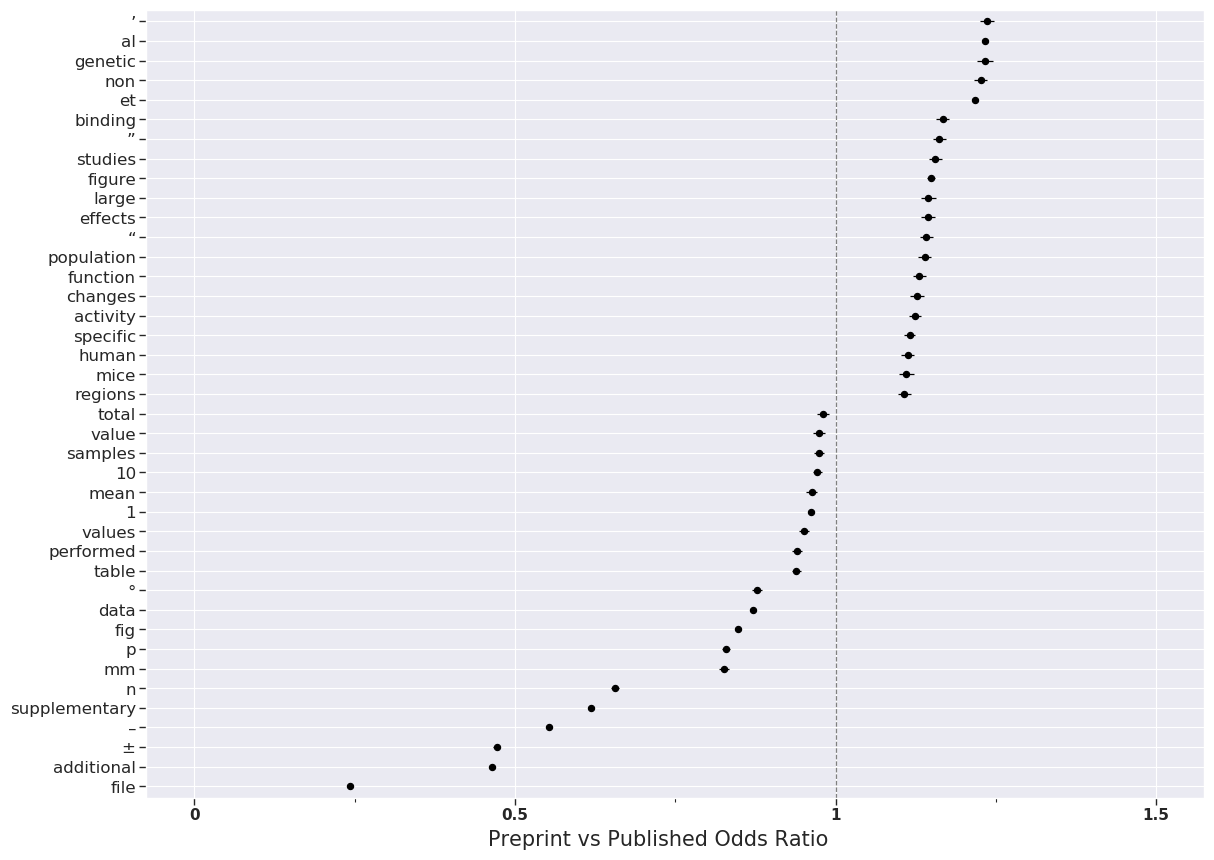

<ggplot: (-9223363309190873365)>


In [29]:
g = plot_pointplot(plot_df, "Preprint vs Published Odds Ratio", limits=[0,1.5])
g.save("output/svg_files/preprint_published_frequency_odds.svg", dpi=75)
print(g)

In [30]:
count_plot_df = create_lemma_count_df(
    plot_df, 'preprint', 'published'
)
count_plot_df.head()

,lemma,count,repository
0,’,119331,preprint
1,al,588656,preprint
2,genetic,93449,preprint
3,non,126616,preprint
4,et,592718,preprint


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 13.653333333333334 x 10.24 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/preprint_published_frequency_bar.svg
  warn('Filename: {}'.format(filename), PlotnineWarning)


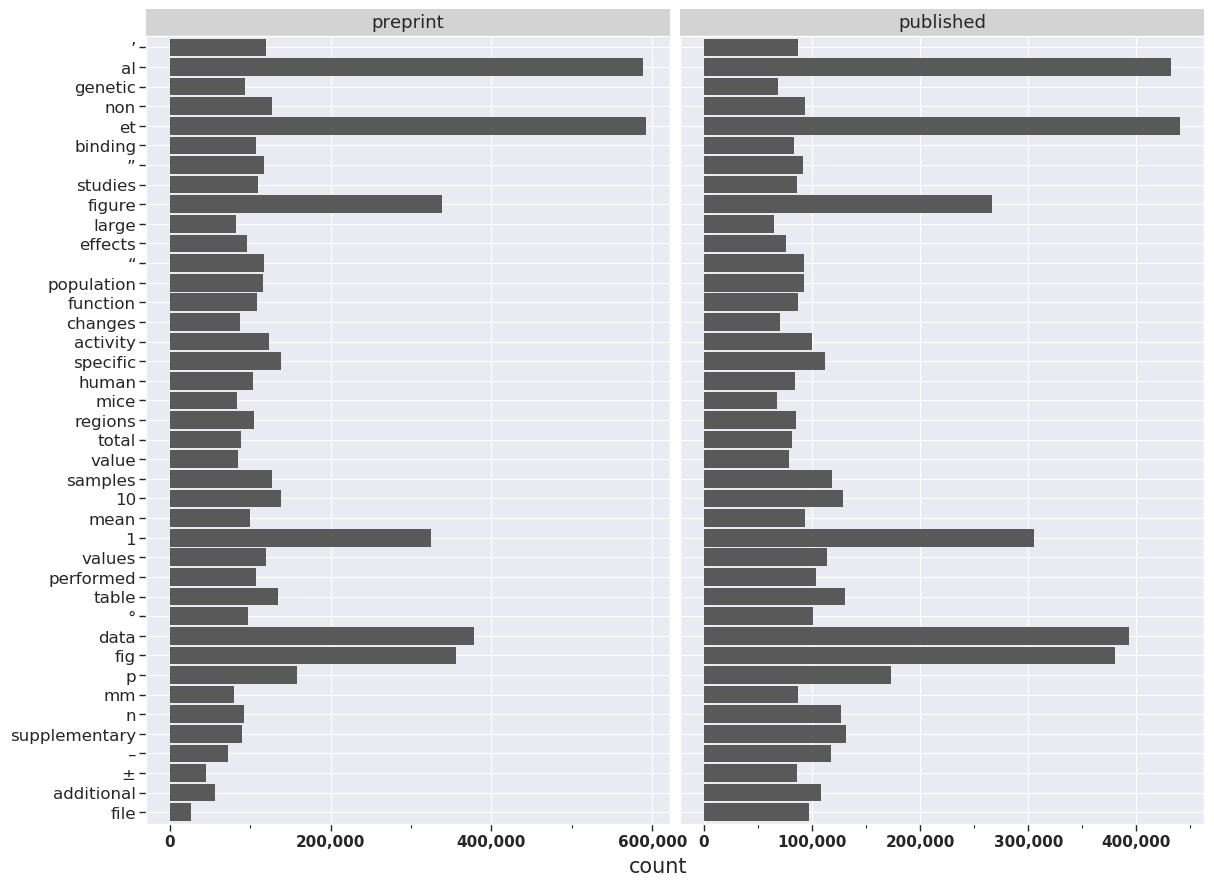

<ggplot: (8727666159101)>


In [31]:
g = plot_bargraph(count_plot_df, plot_df)
g.save("output/svg_files/preprint_published_frequency_bar.svg", dpi=75)
print(g)

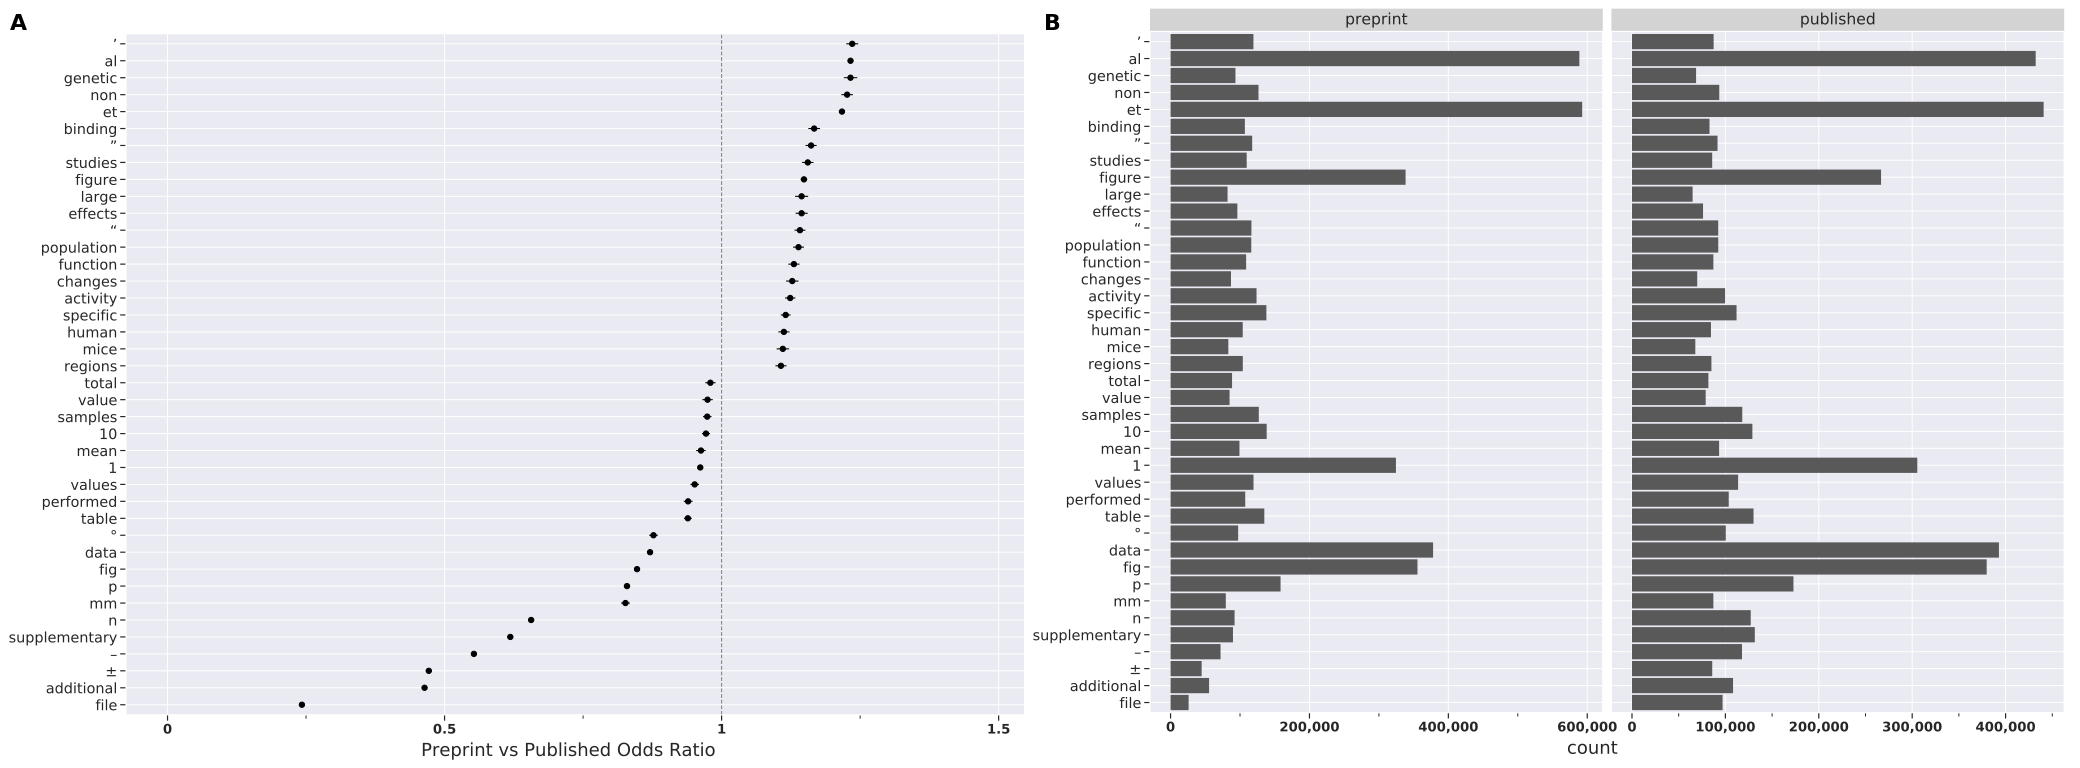

In [32]:
fig_output_path = "output/figures/preprint_published_comparison.png"

fig = plot_point_bar_figure(
    "output/svg_files/preprint_published_frequency_odds.svg",
    "output/svg_files/preprint_published_frequency_bar.svg"
)

# save generated SVG files
svg2png(
    bytestring=fig.to_str(), 
    write_to=fig_output_path,
    dpi=500
)

Image(fig_output_path)